# Process rosbag and plot for ICRA 2021 video submission

In [14]:
# Auto Reload Modules
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.signal import lfilter

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rc, font_manager, transforms
from matplotlib.ticker import FormatStrFormatter

from bag_utils import extract_traj
from plot_utils import plot_map_2d, plot_map_3d, plot_car_frames

import os
notebook_dir = str(os.getcwd())

DATA_DIR = '/data/barc_data/successful_runs_11_01'

# Ouput directory
OUT_DIR = os.path.join(notebook_dir, 'plot_out')
if not os.path.isdir(OUT_DIR):
    os.mkdir(OUT_DIR)
    
np.random.seed(0)

map_bounds = [0, 6, -1, 1]

rc('font', **{'family': "Times New Roman"})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Load bag and extract data

In [2]:
import glob
bag_files = glob.glob(os.path.join(DATA_DIR,'*.bag'))
print('Found bags:', bag_files)

('Found bags:', ['/data/barc_data/successful_runs_11_01/barc_run_strategy_obca_2020-11-01-16-59-53_exp_10.bag'])


In [3]:
bag_num = 0
bag_name = bag_files[bag_num]
FSM_strat, EV_strat, TV_strat = extract_traj(bag_name)

('Topics contained:', ['/ego_vehicle/pred_states', '/overhead_camera/image_rectification_rectify_mono/parameter_descriptions', '/overhead_camera/image_rectification_rectify_mono/parameter_updates', '/ego_vehicle/cam_est', '/target_vehicle/t265/tracking_module/parameter_updates', '/rosout_agg', '/tf_static', '/target_vehicle/t265/gyro/imu_info', '/ego_vehicle/t265/accel/sample', '/target_vehicle/cam_est', '/overhead_camera/camera_info', '/target_vehicle/est_states', '/target_vehicle/t265/realsense2_camera_manager/bond', '/target_vehicle/vel_est', '/ego_vehicle/vel_est', '/ego_vehicle/t265/tracking_module/parameter_descriptions', '/ego_vehicle/fsm_state', '/ego_vehicle/t265/fisheye1/camera_info', '/ego_vehicle/controller_arduino', '/target_vehicle/t265/fisheye1/camera_info', '/target_vehicle/t265/odom/sample', '/target_vehicle/encoder', '/diagnostics', '/target_vehicle/controller_logger', '/start_time', '/target_vehicle/controller_arduino', '/overhead_camera/image_rectification_debayer/p

### Choose overhead camera frame number

In [9]:
from bag_utils import VideoReader
vid_reader = VideoReader(bag_name)

Video of duration 51.0398 s read in as 1275 frames


(1604278810.632543, 385)


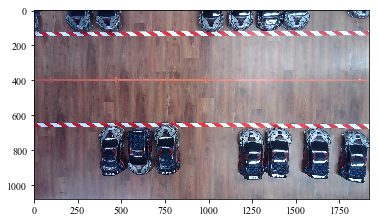

In [13]:
frame_num = 1000
time = 15.4
# frame, t = vid_reader.get_frame(frame=frame_num)
image, t, frame_num = vid_reader.get_frame(time=time)
print(t, frame_num)
plt.imshow(frame)

### Plot trajectory trace with axis labels

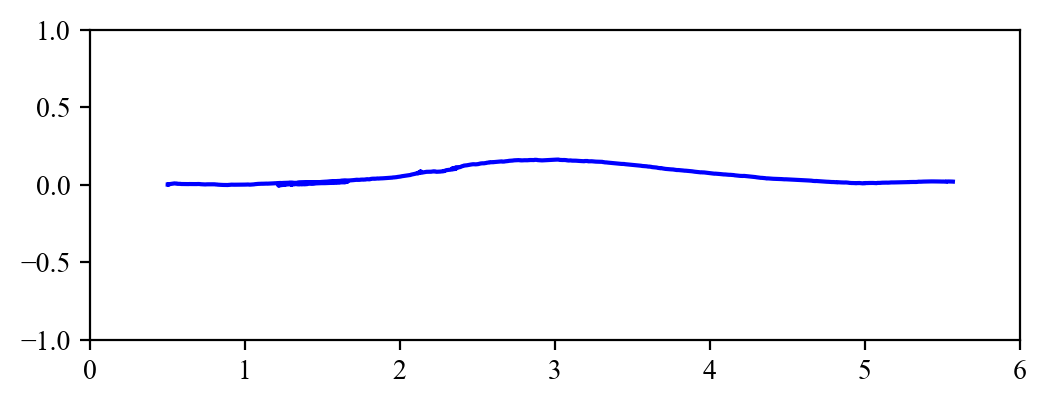

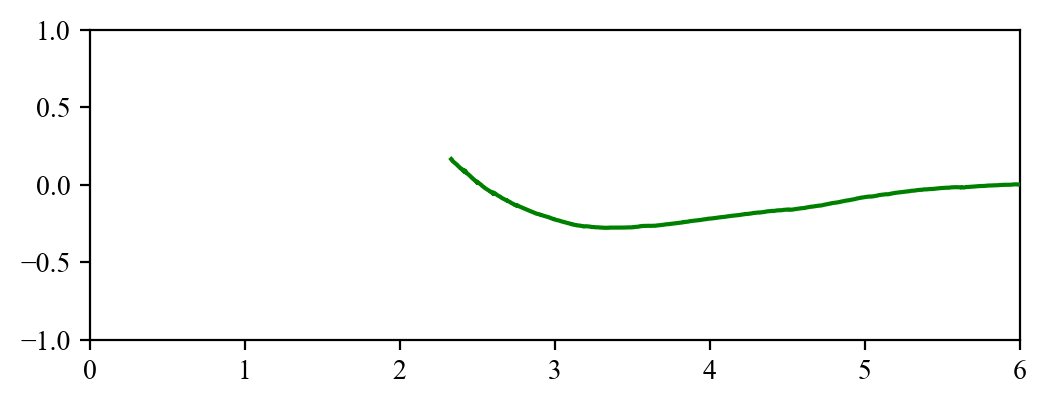

In [19]:
ev_traj_fig = plt.figure('ev_trajectory_trace', dpi=200)
ev_traj_ax = ev_traj_fig.gca()

ev_traj_ax.plot(EV_strat.x, EV_strat.y, linewidth=1.5, color='b', label="EV", zorder=5)
ev_traj_ax.set_xlim(map_bounds[:2])
ev_traj_ax.set_ylim(map_bounds[2:])
ev_traj_ax.set_aspect('equal')


tv_traj_fig = plt.figure('tv_trajectory_trace', dpi=200)
tv_traj_ax = tv_traj_fig.gca()

tv_traj_ax.plot(TV_strat.x, TV_strat.y, linewidth=1.5, color='g', label="TV", zorder=5)
tv_traj_ax.set_xlim(map_bounds[:2])
tv_traj_ax.set_ylim(map_bounds[2:])
tv_traj_ax.set_aspect('equal')

plt.draw()
plt.show()

fig_name = os.path.join(OUT_DIR, 'ev_traj_trace_axis_frame_' + str(frame_num) + '.png')
ev_traj_fig.savefig(fig_name, transparent=True)
fig_name = os.path.join(OUT_DIR, 'tv_traj_trace_axis_frame_' + str(frame_num) + '.png')
tv_traj_fig.savefig(fig_name, transparent=True)

### Plot trajectory trace without axis labels

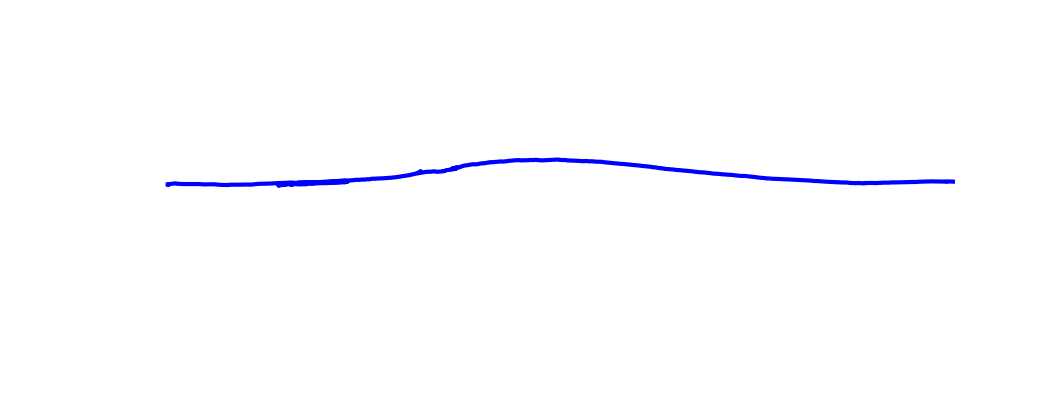

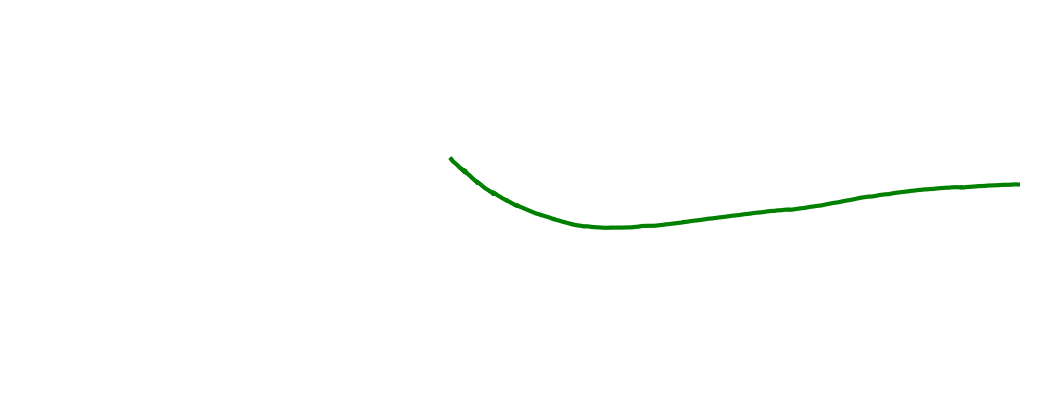

In [20]:
ev_traj_fig = plt.figure('ev_trajectory_trace', dpi=200)
ev_traj_ax = ev_traj_fig.gca()

ev_traj_ax.plot(EV_strat.x, EV_strat.y, linewidth=1.5, color='b', label="EV", zorder=5)
ev_traj_ax.set_xlim(map_bounds[:2])
ev_traj_ax.set_ylim(map_bounds[2:])
ev_traj_ax.set_aspect('equal')
ev_traj_ax.axis('off')

tv_traj_fig = plt.figure('tv_trajectory_trace', dpi=200)
tv_traj_ax = tv_traj_fig.gca()

tv_traj_ax.plot(TV_strat.x, TV_strat.y, linewidth=1.5, color='g', label="TV", zorder=5)
tv_traj_ax.set_xlim(map_bounds[:2])
tv_traj_ax.set_ylim(map_bounds[2:])
tv_traj_ax.set_aspect('equal')
tv_traj_ax.axis('off')

plt.draw()
plt.show()

fig_name = os.path.join(OUT_DIR, 'ev_traj_trace_axis_frame_' + str(frame_num) + '.png')
ev_traj_fig.savefig(fig_name, transparent=True)
fig_name = os.path.join(OUT_DIR, 'tv_traj_trace_axis_frame_' + str(frame_num) + '.png')
tv_traj_fig.savefig(fig_name, transparent=True)

### Plot States and Inputs

In [ ]:
fig_name = "States_Inputs"

fig = plt.figure(fig_name, figsize=(12, 7))

# ================= Speed Subplot
ax_speed = plt.subplot(3, 1, 1)

# Filtering
n = 20
b = [1.0 / n] * n
a = 1

naive_v_filter = lfilter(b, a, EV_naive.v)
strat_v_filter = lfilter(b, a, EV_strat.v)

t_naive = np.array(EV_naive.state_t) - EV_naive.state_t0
ax_speed.plot(t_naive, naive_v_filter, linewidth=5, color='C4', linestyle='--', label="BL")

t_strat = np.array(EV_strat.state_t) - EV_strat.state_t0
ax_speed.plot(t_strat, strat_v_filter, linewidth=5, color='C1', label="SG")

ax_speed.set_ylabel("Speed\n(m/s)", fontsize=25, fontweight="bold")
ax_speed.set_xlim(left=0, right=30)
ax_speed.set_ylim(bottom=-0.6, top=0.6)

ax_speed.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
ax_speed.tick_params(axis='y', labelsize=20)
ax_speed.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_speed.tick_params(axis='x', bottom=False, labelbottom=False)

# ================== Input subplot

# Delta
ax_delta = plt.subplot(3, 1, 2)

t_naive = np.array(EV_naive.input_t) - EV_naive.input_t0
ax_delta.plot(t_naive, EV_naive.delta, linewidth=5, color='C4', linestyle='--', label="BL")

t_strat = np.array(EV_strat.input_t) - EV_strat.input_t0
ax_delta.plot(t_strat, EV_strat.delta, linewidth=5, color='C1', label="SG")

ax_delta.set_ylabel("Steering\n(rad)", fontsize=25, fontweight="bold")
ax_delta.set_xlim(left=0, right=30)
ax_delta.set_ylim(bottom=-0.6, top=0.6)

ax_delta.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
ax_delta.tick_params(axis='y', labelsize=20)
ax_delta.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_delta.tick_params(axis='x', bottom=False, labelbottom=False)

# Acc
ax_acc = plt.subplot(3, 1, 3)

ax_acc.plot(t_naive, EV_naive.a, linewidth=5, color='C4', linestyle='--', label="BL")

ax_acc.plot(t_strat, EV_strat.a, linewidth=5, color='C1', label="SG")

ax_acc.set_xlabel("Time (s)", fontsize=25, fontweight="bold")
ax_acc.set_ylabel("Accel\n(m/s$^2$)", fontsize=25, fontweight="bold")

ax_acc.set_xlim(left=0, right=30)
ax_acc.set_ylim(bottom=-1.2, top=1.2)


ax_acc.set_yticks([-1, -0.5, 0, 0.5, 1])
ax_acc.tick_params(axis='y', labelsize=20)
ax_acc.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_acc.tick_params(axis='x', labelsize=20)

plt.subplots_adjust(hspace=0.1)
plt.tight_layout()


### Plot Score and FSM

In [ ]:
fig_name = "Score_FSM"

fig = plt.figure(fig_name, figsize=(12, 6))

# ================= Score Subplot
ax_score = plt.subplot(2, 1, 1)

strat_t = np.array(FSM_strat.t) - FSM_strat.t0
ax_score.plot(strat_t, FSM_strat.score_l, linewidth=5, color='C3', linestyle='solid', label="Pass Left")
ax_score.plot(strat_t, FSM_strat.score_r, linewidth=5, color='C5', linestyle='dashed', label="Pass Right")
ax_score.plot(strat_t, FSM_strat.score_y, linewidth=5, color='C6', linestyle='dashdot', label="Yield")

ax_score.set_xlim([0, 16])
ax_score.set_ylim([-0.02, 1.02])

ax_score.set_ylabel("Confidence", labelpad=40, fontsize=25, fontweight="bold")

ax_score.tick_params(axis='y', labelsize=20)

ax_score.tick_params(axis='x', bottom=False, labelbottom=False)

ax_score.grid(axis='y')

ax_score.legend(fontsize=20)

# ================== Policy subplot

ax_policy = plt.subplot(2, 1, 2)

naive_t = np.array(FSM_naive.t) - FSM_naive.t0

ax_policy.plot(naive_t, FSM_naive.state_idxs, linewidth=5, color='C4', linestyle='--', label="BL")

ax_policy.plot(strat_t, FSM_strat.state_idxs, linewidth=5, color='C1', label="SG")

ax_policy.set_xlabel("Time (s)", fontsize=25, fontweight="bold")
ax_policy.set_ylabel("Policy", fontsize=25, fontweight="bold")

ax_policy.set_xlim([0, 20])
ax_policy.set_ylim([-0.5, 2.5])

ax_policy.set_yticks([0, 1, 2])

FSM_strat.state_names = ["SG/BL-\nOBCA", "SC", "EB"]

ax_policy.set_yticklabels(FSM_strat.state_names)
ax_policy.tick_params(axis='y', labelsize=20)

ax_policy.tick_params(axis='x', labelsize=20)

ax_policy.grid(axis='y')

plt.subplots_adjust(hspace=0.01)
plt.tight_layout()


### Plot the state and policy

In [ ]:
fig_name = "States_Policy"

t_max = 17

fig = plt.figure(fig_name, figsize=(12, 11))

# ================= Speed Subplot
ax_speed = plt.subplot(5, 1, 1)

# Filtering
n = 20
b = [1.0 / n] * n
a = 1

naive_v_filter = lfilter(b, a, EV_naive.v)
strat_v_filter = lfilter(b, a, EV_strat.v)

t_naive = np.array(EV_naive.state_t) - EV_naive.state_t0
ax_speed.plot(t_naive, naive_v_filter, linewidth=5, color='C4', linestyle='--', label="BL")

t_strat = np.array(EV_strat.state_t) - EV_strat.state_t0
ax_speed.plot(t_strat, strat_v_filter, linewidth=5, color='C1', label="SG")

ax_speed.set_ylabel("Speed\n(m/s)", fontsize=25, fontweight="bold")
ax_speed.set_xlim(left=0, right=t_max)
ax_speed.set_ylim(bottom=-0.6, top=0.6)

ax_speed.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
ax_speed.tick_params(axis='y', labelsize=20)
ax_speed.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_speed.tick_params(axis='x', bottom=False, labelbottom=False)

# ================== Input subplot

# Delta
ax_delta = plt.subplot(5, 1, 2)

t_naive = np.array(EV_naive.input_t) - EV_naive.input_t0
ax_delta.plot(t_naive, EV_naive.delta, linewidth=5, color='C4', linestyle='--', label="BL")

t_strat = np.array(EV_strat.input_t) - EV_strat.input_t0
ax_delta.plot(t_strat, EV_strat.delta, linewidth=5, color='C1', label="SG")

ax_delta.set_ylabel("Steering\n(rad)", fontsize=25, fontweight="bold")
ax_delta.set_xlim(left=0, right=t_max)
ax_delta.set_ylim(bottom=-0.6, top=0.6)

ax_delta.set_yticks([-0.5, -0.25, 0, 0.25, 0.5])
ax_delta.tick_params(axis='y', labelsize=20)
ax_delta.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_delta.tick_params(axis='x', bottom=False, labelbottom=False)

# Acc
ax_acc = plt.subplot(5, 1, 3)

ax_acc.plot(t_naive, EV_naive.a, linewidth=5, color='C4', linestyle='--', label="BL")

ax_acc.plot(t_strat, EV_strat.a, linewidth=5, color='C1', label="SG")

ax_acc.set_ylabel("Accel\n(m/s$^2$)", fontsize=25, fontweight="bold")

ax_acc.set_xlim(left=0, right=t_max)
ax_acc.set_ylim(bottom=-1.2, top=1.2)


ax_acc.set_yticks([-1, -0.5, 0, 0.5, 1])
ax_acc.tick_params(axis='y', labelsize=20)
ax_acc.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

ax_acc.tick_params(axis='x', bottom=False, labelbottom=False)

# ================= Score Subplot
ax_score = plt.subplot(5, 1, 4)

strat_t = np.array(FSM_strat.t) - FSM_strat.t0
ax_score.plot(strat_t, FSM_strat.score_l, linewidth=5, color='C3', linestyle='solid', label="Pass Left")
ax_score.plot(strat_t, FSM_strat.score_r, linewidth=5, color='C5', linestyle='dashed', label="Pass Right")
ax_score.plot(strat_t, FSM_strat.score_y, linewidth=5, color='C6', linestyle='dashdot', label="Yield")

ax_score.set_xlim([0, t_max])
ax_score.set_ylim([-0.02, 1.02])

ax_score.set_ylabel("Confidence", labelpad=42.5, fontsize=25, fontweight="bold")
ax_score.set_yticks([0, 0.5, 1])

ax_score.tick_params(axis='y', labelsize=20)

ax_score.tick_params(axis='x', bottom=False, labelbottom=False)

ax_score.grid(axis='y')

ax_score.legend(loc='center right', fontsize=15)

# ================== Policy subplot

ax_policy = plt.subplot(5, 1, 5)

naive_t = np.array(FSM_naive.t) - FSM_naive.t0

ax_policy.plot(naive_t, FSM_naive.state_idxs, linewidth=5, color='C4', linestyle='--', label="BL")

ax_policy.plot(strat_t, FSM_strat.state_idxs, linewidth=5, color='C1', label="SG")

ax_policy.set_xlabel("Time (s)", fontsize=25, fontweight="bold")
ax_policy.set_ylabel("Policy", fontsize=25, fontweight="bold")

ax_policy.set_xlim([0, t_max])
ax_policy.set_ylim([-0.5, 2.5])

ax_policy.set_yticks([0, 1, 2])

FSM_strat.state_names = ["SG/BL-\nOBCA", "SC", "EB"]

ax_policy.set_yticklabels(FSM_strat.state_names)
ax_policy.tick_params(axis='y', labelsize=20)

ax_policy.tick_params(axis='x', labelsize=20)

ax_policy.grid(axis='y')

plt.subplots_adjust(hspace=0.01)
plt.tight_layout()
